### Age vs Customer Churn

In [13]:
import pandas as pd

In [14]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [23]:
# Define bins and their labels
bins = [21, 25, 30, 35, 40, 45, 50, 55, 60, 65]  
labels = ['21-24', '25-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']

# Bin the age data
train['Age_Group'] = pd.cut(train['Age'], bins=bins, labels=labels, right=False)

In [24]:
from sklearn.preprocessing import OneHotEncoder

# Reshape the Age_Group column to a 2D array
age_groups = train['Age_Group'].values.reshape(-1, 1)

encoder = OneHotEncoder(drop='first') 
age_group_encoded = encoder.fit_transform(age_groups).toarray()

column_names = encoder.get_feature_names_out(input_features=['Age_Group'])

age_group_encoded_df = pd.DataFrame(age_group_encoded, 
                                    columns=column_names,
                                    index=train.index)

# Concatenate the original DataFrame and the new one-hot encoded DataFrame
train = pd.concat([train, age_group_encoded_df], axis=1)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Calculate the proportion of churn for each age group
age_churn_proportion = train.groupby('Age_Group', observed = True)['Customer_Churn'].value_counts(normalize=True).unstack()

print(age_churn_proportion)

Customer_Churn         0         1
Age_Group                         
21-24           0.623348  0.376652
25-30           0.653704  0.346296
31-35           0.701252  0.298748
36-40           0.560932  0.439068
41-45           0.595318  0.404682
46-50           0.599665  0.400335
51-55           0.504394  0.495606
56-60           0.494915  0.505085
61-65           0.514019  0.485981


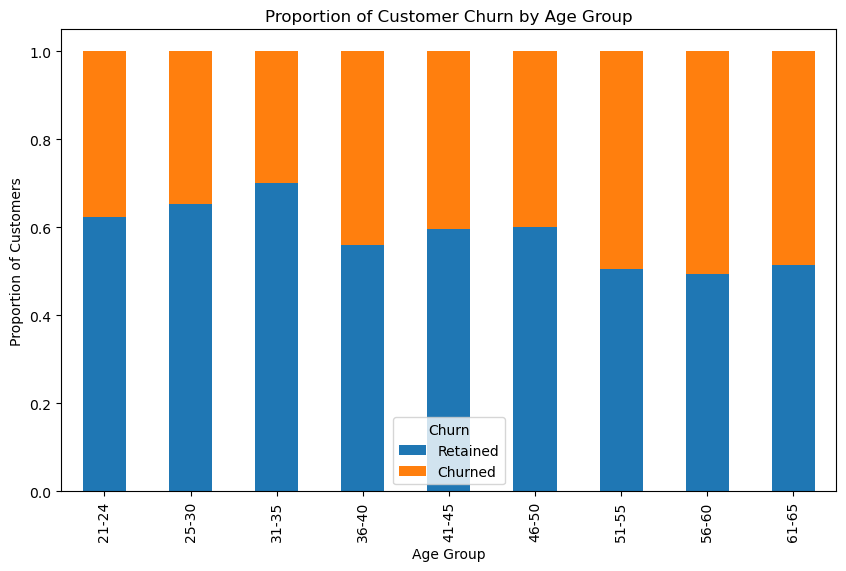

In [27]:
# Plotting
age_churn_proportion.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Proportion of Customer Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Customers')
plt.legend(title='Churn', labels=['Retained', 'Churned'])  
plt.show()

Given a binwidth of 5 years, we notice that there are non-linear patterns displayed between the age group and proportion of customers. As such, we will try to implement binning the ages in feature engineering